In [ ]:
# Sprendimų medžiai / decision tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# import numpy package for arrays and stuff
import numpy as np
# import matplotlib.pyplot for plotting our result
import matplotlib.pyplot as plt
# import pandas for importing csv files
import pandas as pd


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
# import sqlite3
# import mysql.connector as cnt
# import plotly.express as px

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split, cross_val_score
from Skriptai.manofunkcijos import *
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

from sklearn.tree import DecisionTreeRegressor

from sklearn.tree import DecisionTreeClassifier


In [5]:
dataset = np.array(
[['Asset Flip', 100, 1000],
['Text Based', 500, 3000],
['Visual Novel', 1500, 5000],
['2D Pixel Art', 3500, 8000],
['2D Vector Art', 5000, 6500],
['Strategy', 6000, 7000],
['First Person Shooter', 8000,15000],
['Simulator', 9500, 20000],
['Racing', 12000, 21000],
['RPG', 14000, 25000],
['Sandbox', 15500, 27000],
['Open-World', 16500, 30000],
['MMOFPS', 25000, 52000],
['MMORPG', 30000, 80000]
])

In [9]:
X = dataset[:, 1:2].astype(int); X # 1 stulpelis, visos eilutės kaip X - features set'as

array([[  100],
       [  500],
       [ 1500],
       [ 3500],
       [ 5000],
       [ 6000],
       [ 8000],
       [ 9500],
       [12000],
       [14000],
       [15500],
       [16500],
       [25000],
       [30000]])

In [8]:
y = dataset[:, 2].astype(int); y

array([ 1000,  3000,  5000,  8000,  6500,  7000, 15000, 20000, 21000,
       25000, 27000, 30000, 52000, 80000])

In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [11]:
regressor = DecisionTreeRegressor(random_state = 0)

In [12]:
regressor.fit(X,y)

DecisionTreeRegressor(random_state=0)

In [14]:
import warnings
warnings.filterwarnings('ignore')

In [15]:
y_pred = regressor.predict([[3750]])
# print the predicted price
print("Predicted price: % d\n"% y_pred)

Predicted price:  8000



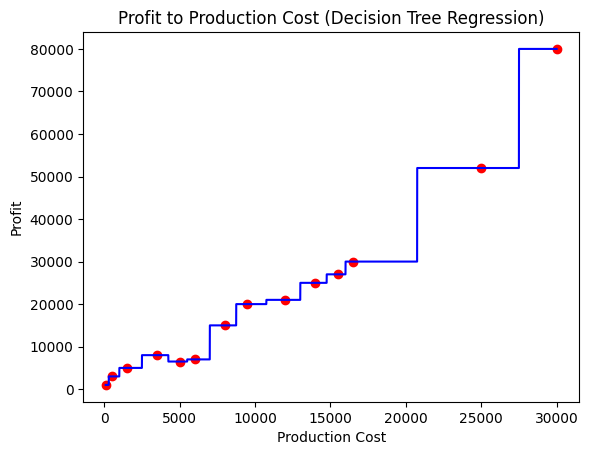

In [18]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Profit to Production Cost (Decision Tree Regression)')
# specify X axis label
plt.xlabel('Production Cost')
# specify Y axis label
plt.ylabel('Profit')
plt.show()

In [20]:
y_p = regressor.predict(X)
accuracy_score(y, y_p)

1.0

In [21]:
from sklearn.tree import export_graphviz

In [23]:
export_graphviz(regressor, out_file ='tree.dot', feature_names =['Production Cost'])
# Atidaroma per http://www.webgraphviz.com/ įkėlus nukopijuota iš notepad

In [ ]:
# Sprendžiama problema: Savaitgalio veiklos pasirinkimas
# Sprendimo taškai:
# • Orai: Ar bus saulėta, ar lietinga?
# • Energingumo lygis: Ar jaučiatės energingi, ar pavargę?
# • Kompanija: Ar draugai gali prisijungti?
# Sprendimų medžiui sukurti naudokite draw.io

In [ ]:
# Tiesinės regresijos ir sprendimų medžio (regresoriaus) palyginimas : paimkite savo darytą automobilių bei butų (pardavimui)  
# kainos spėjimo algoritmą su linijine regresija, tuos pačius duomenis pateikite DecissionTreeRegressor(). 
# Abiem atvejais paskaičiuokite accuracy_score, patestuokite su 2-5 vartotojo įvestimis. Kuris modelis davė tikslesnius rezultatus? 

In [27]:
db_path = '../../../web_scrap.db'
query = 'SELECT * FROM autopliuslt2;'  # SQL užklausa, kurią norite vykdyti

autoplius = query_to_dataframe(db_path, query); autoplius

   
def kw(x):
    if x != None:
        if 'kW' in x:
            return int(x.split('(')[1].replace('kW)',''))
        else:
            return None
    else:
        return None
    
dft = autoplius
dft['Kaina'] = dft['Kaina'].apply(lambda x: float(x))
dft['Rida'] = dft['Rida'].apply(lambda x: x[:-3].replace(' ','') if x != None else x)
dft['Rida'] = dft['Rida'].apply(lambda x: float(x) if x!= None and x!='' else x )
dft['Amžius'] = dft['Pirma registracija'].apply(lambda x: int(2024-int(x[:4])) if x!= None else x)
dft['Galingumas'] = dft['Variklis'].apply(kw)
dft['Tik Miestas'] = dft['Miestas'].apply(lambda x: x.split(',')[0] if x!=None else None)

l2 = LabelEncoder().fit_transform(dft['Markė'])
l2_dict = dict(zip(dft['Markė'],l2))
l3 = LabelEncoder().fit_transform(dft['Modelis'])
l3_dict = dict(zip(dft['Modelis'],l3))
l4 = LabelEncoder().fit_transform(dft['Tik Miestas'])
l4_dict = dict(zip(dft['Tik Miestas'],l4))
l5 = LabelEncoder().fit_transform(dft['Kuro tipas'])
l5_dict = dict(zip(dft['Kuro tipas'],l5))
l6 = LabelEncoder().fit_transform(dft['Kėbulo tipas'])
l6_dict = dict(zip(dft['Kėbulo tipas'],l5))


dft['Miestas_enc'] = l4
dft['Markė_enc'] = l2
dft['Modelis_enc'] = l3
dft['Kuro tipas_enc'] = l5
dft['Kėbulo tipas_enc'] = l6


In [36]:
check_df = dft[['Miestas_enc', 'Markė_enc', 'Modelis_enc', 'Kuro tipas_enc', 'Kėbulo tipas_enc', 'Amžius', 'Rida', 'Galingumas', 'Kaina']]
check_df.dropna(inplace=True)
X = check_df[['Miestas_enc', 'Markė_enc', 'Modelis_enc', 'Kuro tipas_enc', 'Kėbulo tipas_enc', 'Amžius', 'Rida', 'Galingumas']]
y = check_df['Kaina']


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

30.84087050259

In [39]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
regressor.score(X_test, y_test)*100.0

67.18858203394626

In [40]:
db_path = '../../../web_scrap.db'
query = 'SELECT * FROM aruodas;'  # SQL užklausa, kurią norite vykdyti

aruodas = query_to_dataframe(db_path, query); aruodas

,id,Miestas,Kaina,Adresas,Namo numeris,Buto numeris,Plotas,Kambarių sk.,Aukštas,Aukštų sk.,...,Tipas,Ypatybės,Papildomos patalpos,Papildoma įranga,Apsauga,Unikalus daikto numeris (RC numeris),Objektas,Kaina mėn.,Bendros erdvės pastate,Coord
0,1,"Vilnius, ŽirmūnaiRiterių g.",165000,"Vilnius, Žirmūnai, Riterių g., 2 kambarių butas",10,127,"40,52 m²",2,5,8,...,Butai pardavimui,None,None,None,None,None,None,None,None,"(54.71684325, 25.291961476410883)"
1,2,"Palanga, PalangaA. Mickevičiaus g.",268000,"Palanga, Palanga, A. Mickevičiaus g., 2 kambar...",None,None,35 m²,2,1,3,...,Butai pardavimui,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nTerasa\nVieta automobiliui,Kondicionierius\nSu baldais\nŠaldytuvas\nŠildo...,Šarvuotos durys\nSignalizacija\nKodinė laiptin...,None,None,None,None,"(55.9171652, 21.0597236)"
2,3,"Vilnius, PašilaičiaiPerkūnkiemio g.",163000,"Vilnius, Pašilaičiai, Perkūnkiemio g., 3 kamba...",53,None,67 m²,3,8,12,...,Butai pardavimui,Tualetas ir vonia atskirai\nInternetas\nKabeli...,Sandėliukas\nVieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,None,None,"(54.737668150000005, 25.213011185027476)"
3,4,"Palanga, PalangaMedvalakio g.",62800,"Palanga, Palanga, Medvalakio g., 2 kambarių butas",27,None,"26,2 m²",2,1,2,...,Butai pardavimui,None,None,None,None,None,None,None,None,"(55.925825599999996, 21.090597860419805)"
4,5,"Palanga, PalangaMedvalakio g.",27700,"Palanga, Palanga, Medvalakio g., 1 kambario butas",27,None,14 m²,1,2,2,...,Butai pardavimui,None,None,None,Šarvuotos durys,None,None,None,None,"(55.925825599999996, 21.090597860419805)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13263,13264,"Klaipėda, CentrasTaikos pr.",1600,"Klaipėda, Centras, Taikos pr., 3 kambarių buto...",32A,None,"97,19 m²",3,4,20,...,Butai nuomai,Nauja kanalizacija\nNauja elektros instaliacij...,Balkonas\nVieta automobiliui,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,1 600 €,None,"(55.6963372, 21.148903157410295)"
13264,13265,"Kaunas, CentrasMiško g.",700,"Kaunas, Centras, Miško g., 2 kambarių buto nuoma",2,None,50 m²,2,3,3,...,Butai nuomai,Nauja kanalizacija\nNauja elektros instaliacij...,Sandėliukas\nDrabužinė,Kondicionierius\nSkalbimo mašina\nSu baldais\n...,Šarvuotos durys\nKodinė laiptinės spyna,None,None,700 €,None,"(54.89371025, 23.92445922114075)"
13265,13266,"Vilnius, FabijoniškėsP. Žadeikos g.",350,"Vilnius, Fabijoniškės, P. Žadeikos g., 1 kamba...",None,None,40 m²,1,1,9,...,Butai nuomai,None,None,None,None,None,None,350 €,None,"(54.731962, 25.2433514)"
13266,13267,"Vilnius, Naujoji VilniaDūmų g.",250,"Vilnius, Naujoji Vilnia, Dūmų g., 1 kambario b...",3,None,20 m²,1,3,3,...,Butai nuomai,Atskiras įėjimas\nNauja kanalizacija\nNauja el...,Vieta automobiliui,Skalbimo mašina\nSu baldais\nŠaldytuvas\nVirtu...,Šarvuotos durys\nKodinė laiptinės spyna\nVaizd...,None,None,250 €,None,"(54.69285295, 25.400292867500028)"


In [41]:
def sildymas(x):
    if x == None:
        return x
    else:
        if len(x.split(',')) == 1:
            return x.split(',')[0]
        else: 
            return 'Hibridinis'
        
def amzius(x):
    if x == None:
        return x
    else:
        if int(x)>=2024:
            return 0
        else:
            return 2024-int(x)

In [42]:
aruodas_df = aruodas
aruodas_df['Plotas_n'] = aruodas_df['Plotas'].apply(lambda x: x.replace(',','.').split()[0] if x!=None else x)
aruodas_df['Miestas_n'] = aruodas_df['Miestas'].apply(lambda x: x.split(' ')[0].split(',')[0])
aruodas_df['Mikrorajonas'] = aruodas_df['Adresas'].apply(lambda x: x.split(',')[1])
aruodas_df['Kaina_n'] = aruodas_df['Kaina'].apply(lambda x: float(x) if x != None else x)
aruodas_df['Šildymo_tipas'] = aruodas_df['Šildymas'].apply(sildymas)
aruodas_df['Metai_n'] = aruodas_df['Metai'].apply(lambda x: int(x[:4]) if x != None else x)

l2 = LabelEncoder().fit_transform(aruodas_df['Miestas_n'])
l2_dict = dict(zip(aruodas_df['Miestas_n'],l2))
l3 = LabelEncoder().fit_transform(aruodas_df['Įrengimas'])
l3_dict = dict(zip(aruodas_df['Įrengimas'],l3))
l4 = LabelEncoder().fit_transform(aruodas_df['Šildymo_tipas'])
l4_dict = dict(zip(aruodas_df['Šildymo_tipas'],l4))
l5 = LabelEncoder().fit_transform(aruodas_df['Pastato tipas'])
l5_dict = dict(zip(aruodas_df['Pastato tipas'],l5))
aruodas_df['Miestas_enc'] = l2
aruodas_df['Įrengimas_enc'] = l3
aruodas_df['Šildymo_tipas_enc'] = l4
aruodas_df['Pastato tipas_enc'] = l5

In [47]:
check_df = aruodas_df[['Miestas_enc', 'Įrengimas_enc', 'Šildymo_tipas_enc', 'Pastato tipas_enc', 'Plotas_n', 'Metai_n', 'Kambarių sk.', 'Aukštas', 'Aukštų sk.', 'Kaina_n', 'Tipas']]
check_df.dropna(inplace=True)
X = check_df[check_df['Tipas'] == 'Butai pardavimui'][['Miestas_enc', 'Įrengimas_enc', 'Šildymo_tipas_enc', 'Pastato tipas_enc', 'Plotas_n', 'Metai_n', 'Kambarių sk.', 'Aukštas', 'Aukštų sk.']]
y = check_df[check_df['Tipas'] == 'Butai pardavimui']['Kaina_n']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)
fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0


60.22721571547823

In [50]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 0.6602426837972877


In [55]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
regressor.score(X_test, y_test)*100.0

38.00932637720666

In [ ]:
# Antra - logistinės regresijos ir sprendimų medžio (classsifier) palyginimas - paimkite savo ankstesnį kodą, 
# skirtą nustatyti, ar eismo įvykis buv su gyvūnu, ar ne, atliktą su logistine regresija. Pritaikykite DecisionTreeClassifier(). 
# paskaičiuokite accuracy_score abiems atvejams. Vizualizuokite comfusiom matrix abiems atvejams. Patestuokite su keliais konkrečiais atvejais. Kuris modelis spėdavo geriau?
# Abiems atvejais vizualizuokite sprendimų medžio algoritmą (gaukite iliustraciją)

In [93]:
ivykiai = pd.read_json('C:/Users/manta/OneDrive/Dokumentai/Python projektai/Eismo_ivykiai/ei_2023_12_31.json')
ivykiai['dataLaikas'] = pd.to_datetime(ivykiai['registravimoData'])
ivykiai['Metai'] = ivykiai['dataLaikas'].dt.year
eil = ivykiai[:1]['eismoDalyviai'] 
def kalt_lytis(x):
    if x != None:
        # try:
            dalyviai = x
            for dalyvis in dalyviai:
                if dalyvis['kaltininkas'] == 'Taip':
                    lytis = dalyvis['lytis']
                    if lytis != 'Nežinoma':
                        return lytis
        # except Exception as e:
            # print(e)
ivykiai['lytis'] = ivykiai['eismoDalyviai'].apply(kalt_lytis)
check_df = ivykiai[['rusis', 'schema1', 'schema2', 'dalyviuSkaicius', 'zuvusiuSkaicius', 'suzeistuSkaicius', 'tpSkaicius', 'apgadintuTpSkaicius', 'dangosRusis', 'dangosBukle', 'parosMetas', 'meteoSalygos', 'kelioGatvesKreive', 'atitvarai', 'leistinasGreitis', 'neblaivusKaltininkai', 'apsvaigeKaltininkai', 'atsisakeTikrintisKaltininkai', 'eismoDalyviai', 'lytis']]
check_df.dropna(inplace=True)
def gyvun(x):
    if x == 'Užvažiavimas ant gyvūno':
        return True
    else:
        return False
check_df['Gyvunas'] = check_df['schema2'].apply(gyvun)

In [94]:
ndf = check_df
l2 = LabelEncoder().fit_transform(ndf['dangosRusis'])
l2_dict = dict(zip(ndf['dangosRusis'],l2))
l3 = LabelEncoder().fit_transform(ndf['dangosBukle'])
l3_dict = dict(zip(ndf['dangosBukle'],l3))
l4 = LabelEncoder().fit_transform(ndf['parosMetas'])
l4_dict = dict(zip(ndf['parosMetas'],l4))
l5 = LabelEncoder().fit_transform(ndf['meteoSalygos'])
l5_dict = dict(zip(ndf['meteoSalygos'],l5))
l6 = LabelEncoder().fit_transform(ndf['kelioGatvesKreive'])
l6_dict = dict(zip(ndf['kelioGatvesKreive'],l6))
l7 = LabelEncoder().fit_transform(ndf['atitvarai'])
l7_dict = dict(zip(ndf['atitvarai'],l7))
l8 = LabelEncoder().fit_transform(ndf['neblaivusKaltininkai'])
l8_dict = dict(zip(ndf['neblaivusKaltininkai'],l8))
l9 = LabelEncoder().fit_transform(ndf['apsvaigeKaltininkai'])
l9_dict = dict(zip(ndf['apsvaigeKaltininkai'],l9))
l10 = LabelEncoder().fit_transform(ndf['atsisakeTikrintisKaltininkai'])
l10_dict = dict(zip(ndf['atsisakeTikrintisKaltininkai'],l10))
l11 = LabelEncoder().fit_transform(ndf['lytis'])
l11_dict = dict(zip(ndf['lytis'],l11))
l12 = LabelEncoder().fit_transform(ndf['rusis'])
l12_dict = dict(zip(ndf['rusis'],l12))
l13 = LabelEncoder().fit_transform(ndf['schema1'])
l13_dict = dict(zip(ndf['schema1'],l13))
l14 = LabelEncoder().fit_transform(ndf['schema2'])
l14_dict = dict(zip(ndf['schema2'],l14))



ndf['dangosRusis'] = l2
ndf['dangosBukle'] = l3
ndf['parosMetas'] = l4
ndf['meteoSalygos'] = l5
ndf['kelioGatvesKreive'] = l6
ndf['atitvarai'] = l7
ndf['neblaivusKaltininkai'] = l8
ndf['apsvaigeKaltininkai'] = l9
ndf['atsisakeTikrintisKaltininkai'] = l10
ndf['lytis'] = l11
ndf['rusis'] = l12
ndf['schema1'] = l13
ndf['schema2'] = l14

In [95]:
X = ndf.drop(columns=['rusis','schema1', 'schema2', 'eismoDalyviai', 'Gyvunas','lytis'])
y = ndf['Gyvunas']
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

In [96]:
fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

2.4238660299668924

In [97]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
regressor.score(X_test, y_test)*100.0

-63.44267043333134

In [87]:
X = ndf.drop(columns=['eismoDalyviai', 'lytis', 'Gyvunas'])
y = ndf['lytis']
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.20,
random_state=23)

In [88]:
fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

2.5593801126910343

In [89]:
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
regressor.score(X_test, y_test)*100.0

-66.84386496418733

In [98]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("jainilcoder/online-payment-fraud-detection")
print("Path to dataset files:", path)

# UŽDUOTIS _ Aptikti sukčiavimą (fraud)

# Stulpelių reikšmės:

# type: type of online transaction
# amount: the amount of the transaction
# nameOrig: customer starting the transaction
# oldbalanceOrg: balance before the transaction
# newbalanceOrig: balance after the transaction
# nameDest: recipient of the transaction
# oldbalanceDest: initial balance of recipient before the transaction
# newbalanceDest: the new balance of recipient after the transaction
# isFraud: fraud transaction

100%|██████████| 178M/178M [00:14<00:00, 12.9MB/s] 

Extracting files...


Path to dataset files: C:\Users\manta\.cache\kagglehub\datasets\jainilcoder\online-payment-fraud-detection\versions\1


In [3]:
fraud = pd.read_csv('../../../onlinefraud.csv'); fraud

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
check_df = fraud

In [5]:
ndf = check_df
l2 = LabelEncoder().fit_transform(ndf['type'])
l2_dict = dict(zip(ndf['type'],l2))
l3 = LabelEncoder().fit_transform(ndf['nameOrig'])
l3_dict = dict(zip(ndf['nameOrig'],l3))
l4 = LabelEncoder().fit_transform(ndf['nameDest'])
l4_dict = dict(zip(ndf['nameDest'],l4))

ndf['type_enc'] = l2
ndf['nameOrig_enc'] = l3
ndf['nameDest_enc'] = l4

In [6]:
X = ndf.drop(columns=['step','type', 'nameOrig', 'nameDest', 'isFraud'])
y = ndf['isFraud']
X_train, X_test,\
y_train, y_test = train_test_split(X, y,
test_size=0.33,
random_state=23)

In [7]:
fit = LinearRegression().fit(X_train, y_train)
pred = fit.predict(X_test)
fit.score(X_test, y_test)*100.0

15.651894933931466

In [26]:
regressor = DecisionTreeClassifier(random_state = 0)
regressor.fit(X_train, y_train)
pred = regressor.predict(X_test)
acc = regressor.score(X_test, y_test)*100.0
print("Decision Tree Regressor model accuracy (in %):", acc)

Decision Tree Regressor model accuracy (in %): 99.96880454739208


In [15]:
# LogisticRegression
clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
# Prediction
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Logistic Regression model accuracy (in %):", acc*100)

Logistic Regression model accuracy (in %): 99.90774718824194


Text(0.5, 1.0, 'DecisionTreeRegressor')

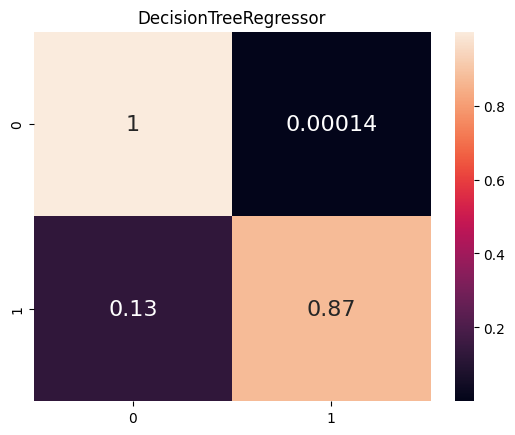

In [27]:
import seaborn as sns
cm = confusion_matrix(y_test, pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})
plt.title('DecisionTreeRegressor')

Text(0.5, 1.0, 'Logistic')

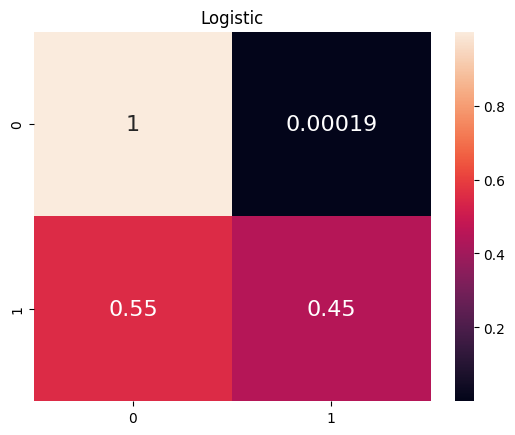

In [28]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(data=cm,annot=True, annot_kws={'fontsize':16})
plt.title('Logistic')

In [ ]:
# pateikti accuracy score tree ir logistic atvejais,
# bei confusion matrix vizualizacijas su seaborn'o heatmap'u